# **GDP Prediction Analysis 🌍📈**

_This notebook leverages machine learning to predict GDP per capita using key economic indicators. The workflow follows a structured approach:_

✅ _**Data Preprocessing** – Cleaning and preparing the dataset_

✅ _**Exploratory Data Analysis (EDA)** – Visualizing trends and correlations_

✅ _**Feature Selection** – Identifying the most influential factors affecting GDP_

✅ _**Model Training** – Comparing Linear Regression and Random Forest_

✅ _**Evaluation & Optimization** – Fine-tuning models for improved accuracy_


🎯 _**Objective**: Develop a robust and reliable model to forecast GDP per capita, helping derive meaningful economic insights._

# *Introduction & Objective*
*This project analyzes GDP data to identify key economic indicators influencing GDP growth.*
*We preprocess the data, train models, and evaluate their performance to derive insights.*


In [7]:
#importing necessary libraries


import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# *Data Cleaning & Preprocessing* 
*The dataset undergoes cleaning to remove inconsistencies, handle missing values,*  
*and transform features for better model performance.  *


In [8]:
# Load dataset
df = pd.read_csv("gdpWorld.csv")

# List of columns to clean
columns_to_fix = [
    'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
    'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
    'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'
]

# Remove unwanted characters and convert to numeric
for col in columns_to_fix:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
df.fillna({
    'Net migration': df['Net migration'].mean(),
    'Infant mortality (per 1000 births)': df['Infant mortality (per 1000 births)'].median(),
    'GDP ($ per capita)': df['GDP ($ per capita)'].median(),
    'Literacy (%)': df['Literacy (%)'].median(),
    'Phones (per 1000)': df['Phones (per 1000)'].median(),
    'Arable (%)': df['Arable (%)'].median(),
    'Crops (%)': df['Crops (%)'].median(),
    'Other (%)': df['Other (%)'].median(),
    'Birthrate': df['Birthrate'].median(),
    'Deathrate': df['Deathrate'].median(),
    'Agriculture': df['Agriculture'].median(),
    'Industry': df['Industry'].median(),
    'Service': df['Service'].median()
}, inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_gdp_dataset.csv", index=False)

print("Dataset cleaned and saved as 'cleaned_gdp_dataset.csv'.")


Dataset cleaned and saved as 'cleaned_gdp_dataset.csv'.


# *Feature Selection*  
*Selecting the most relevant features improves model accuracy and efficiency.*  
*We analyze correlations and drop irrelevant variables.*


           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         2306.0                  

C:\Users\ameeet\AppData\Local\Temp\ipykernel_12868\678220875.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


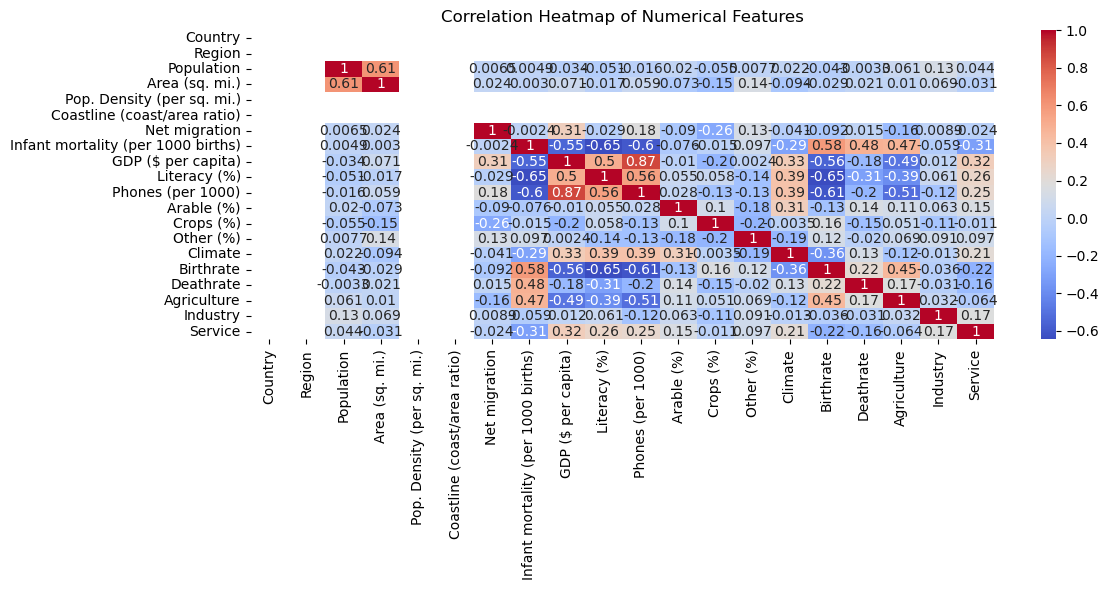

Missing columns: []


In [9]:
# Load Dataset
df = pd.read_csv('cleaned_gdp_dataset.csv')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Display basic info
print(df.head())
print(df.info())

# Drop rows with any missing values (alternative: use imputation for better retention)
df.dropna(inplace=True)

# Strip whitespace from string values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert all applicable data to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Feature Selection: Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Select 6 key features based on EDA
selected_features = ['Population', 'Area (sq. mi.)', 'Literacy (%)', 'Industry', 'Service', 'Phones (per 1000)']

# Check for any missing features
missing_cols = [col for col in selected_features if col not in df.columns]
print("Missing columns:", missing_cols)

# Define Features and Target
X = df[selected_features]
y = df['GDP ($ per capita)']


# *Model Training*  
*We train machine learning models to predict GDP using selected features.*
*Here, we start with a baseline model and refine it with advanced techniques.*  


Linear Regression - MSE: 22089843.59, R² Score: 0.79
Random Forest - MSE: 12827836.55, R² Score: 0.88


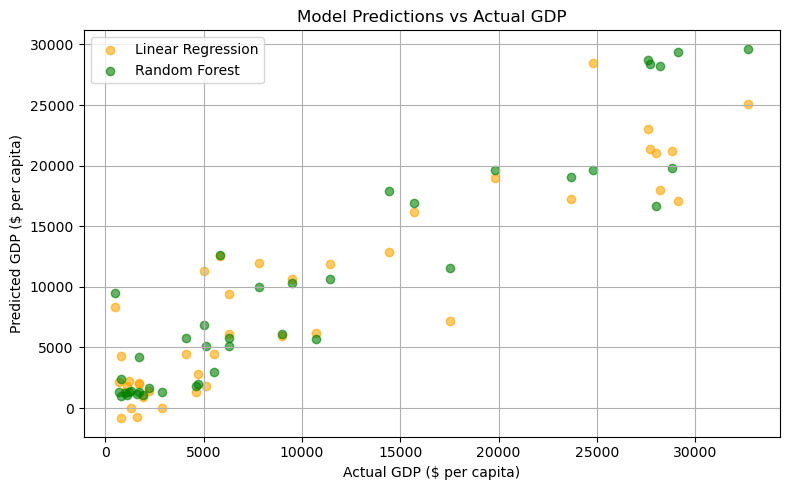

['../models/feature_columns.pkl']

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure DataFrame format (useful for consistent handling)
X_train = X_train.to_frame() if isinstance(X_train, pd.Series) else X_train
X_test = X_test.to_frame() if isinstance(X_test, pd.Series) else X_test

# Standardize Data for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_model.predict(X_test_scaled)

# Random Forest Model (no scaling needed)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - MSE: {mse:.2f}, R² Score: {r2:.2f}')

# Evaluate both models
evaluate_model(y_test, y_pred_lin, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')

# Visualization: Actual vs Predicted GDP
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lin, label='Linear Regression', alpha=0.6, color='orange')
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6, color='green')
plt.xlabel('Actual GDP ($ per capita)')
plt.ylabel('Predicted GDP ($ per capita)')
plt.title('Model Predictions vs Actual GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# After training
import joblib

# Save the model
joblib.dump(rf_model, '../models/best_random_forest.pkl')

# Save the columns used in training
joblib.dump(X_train.columns.tolist(), '../models/feature_columns.pkl')


# *Hyperparameter Tuning* 
*Optimizing model parameters enhances prediction accuracy.*  
*We use Randomized Search CV to find the best combination of hyperparameters.*  


Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Tuned Random Forest Evaluation:
   MSE: 13066490.93
   RMSE: 3614.76
   MAE: 2387.72
   R² Score: 0.88
----------------------------------------


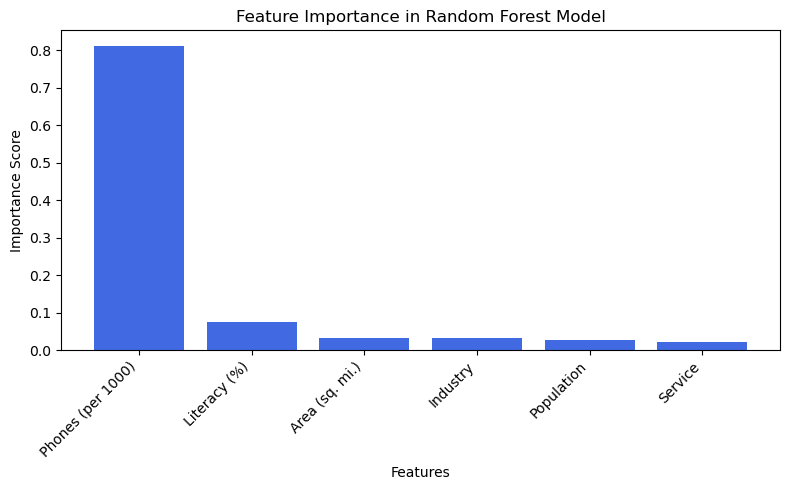

In [11]:
# Load Data
X_train = joblib.load("../data/X_train.pkl")
y_train = joblib.load("../data/y_train.pkl")
X_test = joblib.load("../data/X_test.pkl")
y_test = joblib.load("../data/y_test.pkl")

# Define Model Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f'{model_name} Evaluation:')
    print(f'   MSE: {mse:.2f}')
    print(f'   RMSE: {rmse:.2f}')
    print(f'   MAE: {mae:.2f}')
    print(f'   R² Score: {r2:.2f}')
    print('-' * 40)

# Define Hyperparameter Search Space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter Tuning using RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10,
    cv=5, scoring='r2', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best Model
best_rf_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate Best Model
y_pred_rf_tuned = best_rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf_tuned, "Tuned Random Forest")

# Save Best Model
joblib.dump(best_rf_model, "../models/best_random_forest.pkl")

# Feature Importance Visualization
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center", color="royalblue")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[indices], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()


# *Data Visualization & Insights*  
*We analyze feature importance and trends to derive meaningful economic insights*
*from the trained models.*  


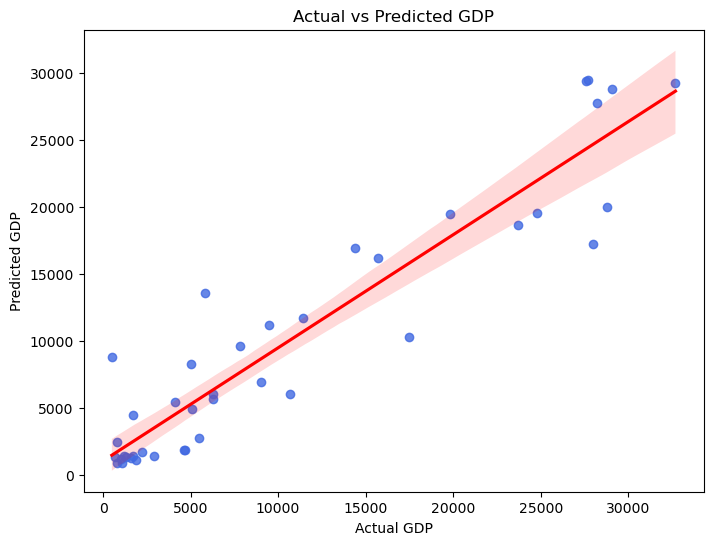

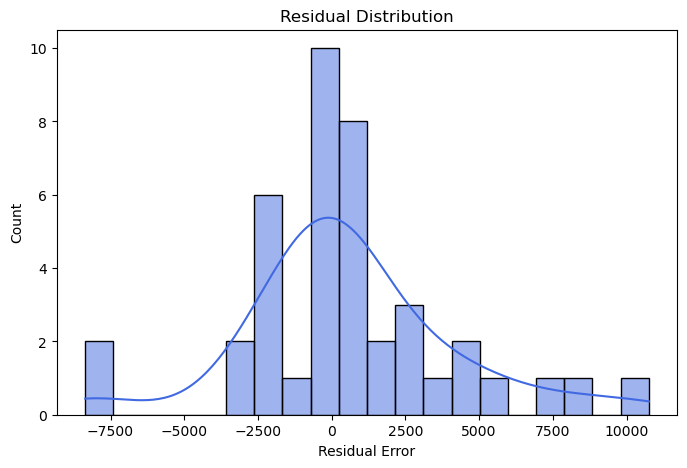

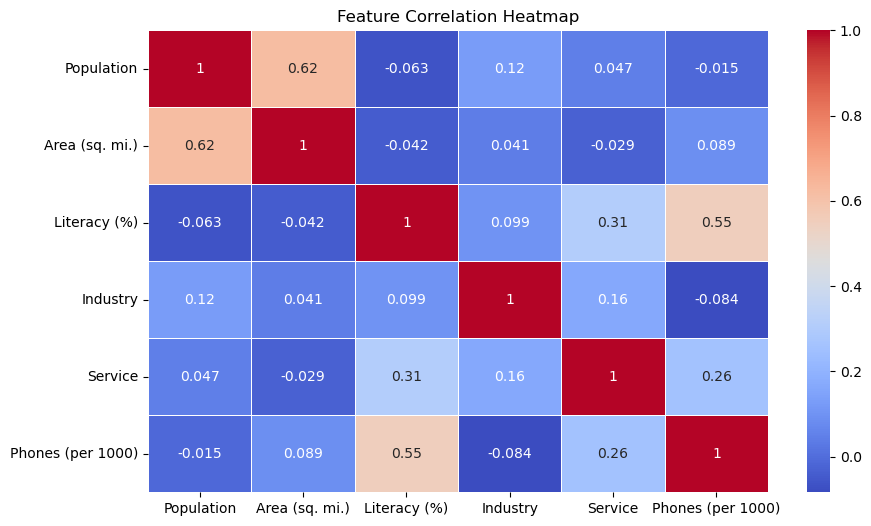

Model Performance Metrics:
  - MSE: 13066490.93
  - RMSE: 3614.76
  - MAE: 2387.72
  - R² Score: 0.88


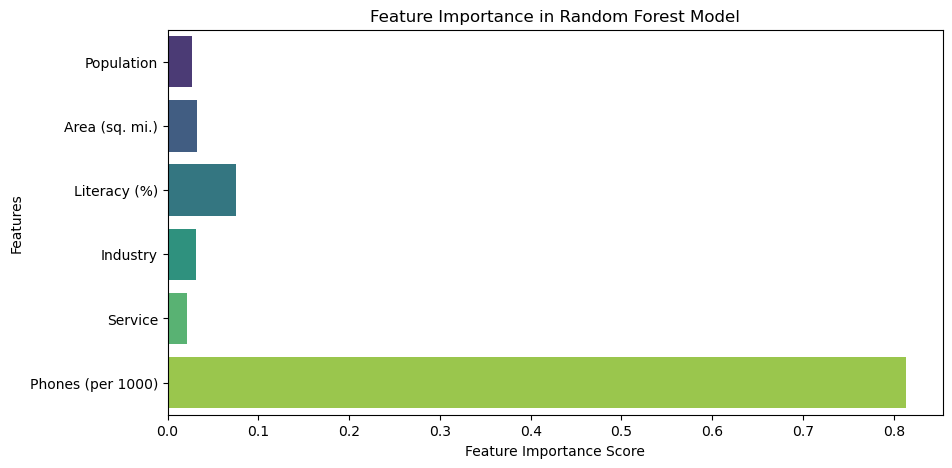

In [12]:
# Predictions vs Actual Values
y_pred = best_rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "royalblue"}, line_kws={"color": "red"})
plt.xlabel("Actual GDP")
plt.ylabel("Predicted GDP")
plt.title("Actual vs Predicted GDP")
plt.show()

# Residual Plot (Errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=20, kde=True, color="royalblue")
plt.xlabel("Residual Error")
plt.title("Residual Distribution")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance Metrics:")
print(f"  - MSE: {mse:.2f}")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - MAE: {mae:.2f}")
print(f"  - R² Score: {r2:.2f}")

# Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis", hue=feature_names, legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()
